In [38]:
#120,130,125,140,134,150,160,190,154
#120,130,125,140,134,150-training,160,190,154-testing
#timesteps=3( the previous 3 days data)
#f1   f2     f3    o/p
#120  130   125    140
#130  125   140    134
#125  140   134    150

In [39]:
import pandas as pd

In [40]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-31,26.752501,26.757500,26.205000,26.315001,24.230719,163649200
1,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.251440,270597600
2,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.643711,223164000
3,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.181011,273829600
4,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.202673,324377600
...,...,...,...,...,...,...,...
1512,2022-01-03,177.830002,182.880005,177.710007,182.009995,182.009995,104487900
1513,2022-01-04,182.630005,182.940002,179.119995,179.699997,179.699997,99310400
1514,2022-01-05,179.610001,180.169998,174.639999,174.919998,174.919998,94537600
1515,2022-01-06,172.699997,175.300003,171.639999,172.000000,172.000000,96904000


In [41]:
df1=df["Close"]
df1

0        26.315001
1        26.337500
2        25.677500
3        25.174999
4        24.112499
           ...    
1512    182.009995
1513    179.699997
1514    174.919998
1515    172.000000
1516    172.169998
Name: Close, Length: 1517, dtype: float64

In [42]:
df1.shape

(1517,)

In [43]:
import matplotlib.pyplot as plt

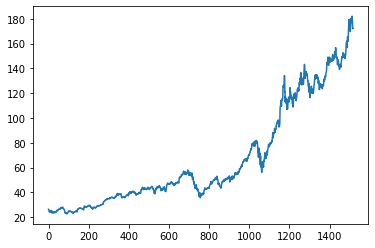

In [44]:
plt.plot(df1)

In [45]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [47]:
df1.shape

(1517, 1)

In [48]:
df1 #now it is in form of 0 and 1

array([[0.02339659],
       [0.02353772],
       [0.01939784],
       ...,
       [0.9555277 ],
       [0.93721188],
       [0.9382782 ]])

In [49]:
training_size=int(len(df1)*0.65)

In [50]:
test_size=len(df1)-training_size

In [51]:
training_size

986

In [52]:
test_size

531

In [53]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [54]:
def create_dataset(dataset,time_step):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):  #1517-99 #1517 is size of data
        a=dataset[i:(i+time_step),0] #dataset[0:99] 0th record,#dataset[1:100] 1st record
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)
                                   

In [55]:
train_data

array([[0.02339659],
       [0.02353772],
       [0.01939784],
       [0.01624588],
       [0.00958131],
       [0.01038106],
       [0.01284304],
       [0.01508547],
       [0.01105536],
       [0.01439548],
       [0.01064764],
       [0.00991063],
       [0.01011448],
       [0.0093461 ],
       [0.01737495],
       [0.01427005],
       [0.01513251],
       [0.00482986],
       [0.00588051],
       [0.01097695],
       [0.00954995],
       [0.00649209],
       [0.0094245 ],
       [0.00981653],
       [0.00577074],
       [0.00732321],
       [0.00729183],
       [0.00616277],
       [0.00526894],
       [0.00572369],
       [0.00987926],
       [0.01220011],
       [0.00928337],
       [0.00893838],
       [0.01025561],
       [0.0068214 ],
       [0.00903247],
       [0.01006744],
       [0.01030266],
       [0.00995767],
       [0.01597931],
       [0.0163243 ],
       [0.0175004 ],
       [0.01986829],
       [0.01808062],
       [0.01676338],
       [0.01690451],
       [0.016

In [56]:
test_data

array([[0.27257333],
       [0.26518742],
       [0.26877842],
       [0.27480006],
       [0.2828446 ],
       [0.2769014 ],
       [0.27934769],
       [0.28293868],
       [0.2840207 ],
       [0.28980712],
       [0.29719303],
       [0.29805553],
       [0.29700486],
       [0.29744393],
       [0.29653444],
       [0.30368513],
       [0.30410851],
       [0.31295282],
       [0.3127803 ],
       [0.31547749],
       [0.31881763],
       [0.32932416],
       [0.32474518],
       [0.32846165],
       [0.32625063],
       [0.33377766],
       [0.34387645],
       [0.34497412],
       [0.35537087],
       [0.34865925],
       [0.34655795],
       [0.35267367],
       [0.3581465 ],
       [0.35475932],
       [0.35653132],
       [0.35893057],
       [0.35748786],
       [0.34281013],
       [0.35651562],
       [0.36694371],
       [0.36620669],
       [0.34368828],
       [0.34235536],
       [0.35833467],
       [0.36241183],
       [0.36830798],
       [0.36018506],
       [0.362

In [57]:
create_dataset(train_data,100)

(array([[0.02339659, 0.02353772, 0.01939784, ..., 0.00765251, 0.00954995,
         0.01185511],
        [0.02353772, 0.01939784, 0.01624588, ..., 0.00954995, 0.01185511,
         0.01455231],
        [0.01939784, 0.01624588, 0.00958131, ..., 0.01185511, 0.01455231,
         0.01579114],
        ...,
        [0.17859496, 0.17199312, 0.17390624, ..., 0.27105224, 0.26920184,
         0.26884116],
        [0.17199312, 0.17390624, 0.17702682, ..., 0.26920184, 0.26884116,
         0.2760389 ],
        [0.17390624, 0.17702682, 0.17470599, ..., 0.26884116, 0.2760389 ,
         0.27277719]]),
 array([0.01455231, 0.01579114, 0.01569704, 0.01492866, 0.01273327,
        0.01157285, 0.01188647, 0.01299984, 0.0136271 , 0.01348598,
        0.01459935, 0.01331348, 0.01097695, 0.01116513, 0.01066333,
        0.01130627, 0.007825  , 0.00746433, 0.00873453, 0.00817   ,
        0.00903247, 0.0047985 , 0.00266584, 0.00509644, 0.00636664,
        0.0082484 , 0.00870316, 0.00729183, 0.00813863, 0.00878157,
 

In [58]:
create_dataset(test_data,100)

(array([[0.27257333, 0.26518742, 0.26877842, ..., 0.29129687, 0.28961896,
         0.30206995],
        [0.26518742, 0.26877842, 0.27480006, ..., 0.28961896, 0.30206995,
         0.3023836 ],
        [0.26877842, 0.27480006, 0.2828446 , ..., 0.30206995, 0.3023836 ,
         0.29518582],
        ...,
        [0.79225343, 0.79357071, 0.80624117, ..., 0.97610163, 0.97214999,
         1.        ],
        [0.79357071, 0.80624117, 0.80040775, ..., 0.97214999, 1.        ,
         0.98551044],
        [0.80624117, 0.80040775, 0.77638391, ..., 1.        , 0.98551044,
         0.9555277 ]]),
 array([0.3023836 , 0.29518582, 0.3095343 , 0.31905284, 0.31163559,
        0.31804926, 0.32494904, 0.32976323, 0.33464012, 0.34466052,
        0.35231303, 0.34666773, 0.34077152, 0.34373533, 0.34086561,
        0.3522346 , 0.34938063, 0.35893057, 0.3551984 , 0.35839741,
        0.35501023, 0.35717421, 0.35739377, 0.35690766, 0.36303907,
        0.36537558, 0.36816686, 0.3637761 , 0.37817157, 0.3812451 ,
 

In [59]:
x_train,y_train=create_dataset(train_data,100)
x_train

array([[0.02339659, 0.02353772, 0.01939784, ..., 0.00765251, 0.00954995,
        0.01185511],
       [0.02353772, 0.01939784, 0.01624588, ..., 0.00954995, 0.01185511,
        0.01455231],
       [0.01939784, 0.01624588, 0.00958131, ..., 0.01185511, 0.01455231,
        0.01579114],
       ...,
       [0.17859496, 0.17199312, 0.17390624, ..., 0.27105224, 0.26920184,
        0.26884116],
       [0.17199312, 0.17390624, 0.17702682, ..., 0.26920184, 0.26884116,
        0.2760389 ],
       [0.17390624, 0.17702682, 0.17470599, ..., 0.26884116, 0.2760389 ,
        0.27277719]])

In [60]:
y_train #the next element of array

array([0.01455231, 0.01579114, 0.01569704, 0.01492866, 0.01273327,
       0.01157285, 0.01188647, 0.01299984, 0.0136271 , 0.01348598,
       0.01459935, 0.01331348, 0.01097695, 0.01116513, 0.01066333,
       0.01130627, 0.007825  , 0.00746433, 0.00873453, 0.00817   ,
       0.00903247, 0.0047985 , 0.00266584, 0.00509644, 0.00636664,
       0.0082484 , 0.00870316, 0.00729183, 0.00813863, 0.00878157,
       0.00994199, 0.01041243, 0.01110241, 0.01023994, 0.01325075,
       0.01323507, 0.01488161, 0.01494434, 0.01508547, 0.01425436,
       0.0130469 , 0.01097695, 0.0099263 , 0.01977419, 0.0219539 ,
       0.02175005, 0.02463542, 0.02217345, 0.0242277 , 0.02435316,
       0.02687786, 0.0282735 , 0.02896346, 0.02769328, 0.02758351,
       0.02797554, 0.03001413, 0.0298573 , 0.02960641, 0.02938687,
       0.02982594, 0.02849304, 0.02902619, 0.02774032, 0.02701898,
       0.02603106, 0.02584288, 0.02455701, 0.02471382, 0.02570175,
       0.02726989, 0.02722283, 0.02825781, 0.0238043 , 0.02005

In [61]:
x_test,y_test=create_dataset(test_data,100)
x_test

array([[0.27257333, 0.26518742, 0.26877842, ..., 0.29129687, 0.28961896,
        0.30206995],
       [0.26518742, 0.26877842, 0.27480006, ..., 0.28961896, 0.30206995,
        0.3023836 ],
       [0.26877842, 0.27480006, 0.2828446 , ..., 0.30206995, 0.3023836 ,
        0.29518582],
       ...,
       [0.79225343, 0.79357071, 0.80624117, ..., 0.97610163, 0.97214999,
        1.        ],
       [0.79357071, 0.80624117, 0.80040775, ..., 0.97214999, 1.        ,
        0.98551044],
       [0.80624117, 0.80040775, 0.77638391, ..., 1.        , 0.98551044,
        0.9555277 ]])

In [62]:
y_test

array([0.3023836 , 0.29518582, 0.3095343 , 0.31905284, 0.31163559,
       0.31804926, 0.32494904, 0.32976323, 0.33464012, 0.34466052,
       0.35231303, 0.34666773, 0.34077152, 0.34373533, 0.34086561,
       0.3522346 , 0.34938063, 0.35893057, 0.3551984 , 0.35839741,
       0.35501023, 0.35717421, 0.35739377, 0.35690766, 0.36303907,
       0.36537558, 0.36816686, 0.3637761 , 0.37817157, 0.3812451 ,
       0.39775757, 0.41163558, 0.38507135, 0.38961894, 0.39618943,
       0.41044378, 0.40967541, 0.40989497, 0.406743  , 0.42109143,
       0.43310336, 0.42295751, 0.4304532 , 0.41287442, 0.42565471,
       0.43039046, 0.42930844, 0.42930844, 0.44458212, 0.44276308,
       0.45637448, 0.45894624, 0.45999687, 0.45722129, 0.46713192,
       0.47131881, 0.46377608, 0.46255294, 0.47528619, 0.46677123,
       0.46848049, 0.44070882, 0.43926612, 0.45303435, 0.44326489,
       0.45447705, 0.46169048, 0.52485498, 0.5416497 , 0.54621298,
       0.54870631, 0.57279284, 0.5552925 , 0.56542264, 0.54439

In [63]:
x_train.shape #no.of rows and no.of shapes

(885, 100)

In [64]:
#converting into 3d
#reshape(samples,timestep,1)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) #last 1 is for converting to 3D
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [65]:
x_train #now it is 3D array

array([[[0.02339659],
        [0.02353772],
        [0.01939784],
        ...,
        [0.00765251],
        [0.00954995],
        [0.01185511]],

       [[0.02353772],
        [0.01939784],
        [0.01624588],
        ...,
        [0.00954995],
        [0.01185511],
        [0.01455231]],

       [[0.01939784],
        [0.01624588],
        [0.00958131],
        ...,
        [0.01185511],
        [0.01455231],
        [0.01579114]],

       ...,

       [[0.17859496],
        [0.17199312],
        [0.17390624],
        ...,
        [0.27105224],
        [0.26920184],
        [0.26884116]],

       [[0.17199312],
        [0.17390624],
        [0.17702682],
        ...,
        [0.26920184],
        [0.26884116],
        [0.2760389 ]],

       [[0.17390624],
        [0.17702682],
        [0.17470599],
        ...,
        [0.26884116],
        [0.2760389 ],
        [0.27277719]]])

In [66]:
x_train.shape

(885, 100, 1)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [68]:
model=Sequential()

In [69]:
model.add(LSTM(200,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(1))

In [70]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 200)          161600    
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 482,601
Trainable params: 482,601
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
28/28 [==============================] - 11s 379ms/step - loss: 6.5777e-05 - val_loss: 6.2984e-04
Epoch 2/10
28/28 [==============================] - 10s 358ms/step - loss: 6.1043e-05 - val_loss: 6.8743e-04
Epoch 3/10
28/28 [==============================] - 11s 385ms/step - loss: 5.4625e-05 - val_loss: 6.8310e-04
Epoch 4/10
28/28 [==============================] - 10s 368ms/step - loss: 5.6220e-05 - val_loss: 6.3879e-04
Epoch 5/10
28/28 [==============================] - 10s 346ms/step - loss: 5.2292e-05 - val_loss: 7.6204e-04
Epoch 6/10
28/28 [==============================] - 11s 393ms/step - loss: 4.9173e-05 - val_loss: 5.8943e-04
Epoch 7/10
28/28 [==============================] - 11s 382ms/step - loss: 8.1389e-05 - val_loss: 0.0012
Epoch 8/10
28/28 [==============================] - 11s 378ms/step - loss: 6.7278e-05 - val_loss: 6.1457e-04
Epoch 9/10
28/28 [==============================] - 10s 357ms/step - loss: 5.7390e-05 - val_loss: 5.6811e-04
Epoch 10/10
28/28 [====

In [74]:
train_predict=model.predict(x_train)

In [75]:
train_predict

array([[0.01187439],
       [0.01366312],
       [0.01559586],
       [0.0173725 ],
       [0.01873502],
       [0.01939355],
       [0.0193764 ],
       [0.01896963],
       [0.01850566],
       [0.01814431],
       [0.0178771 ],
       [0.0178378 ],
       [0.01778907],
       [0.01744706],
       [0.01697623],
       [0.01641856],
       [0.01595313],
       [0.01517705],
       [0.01424821],
       [0.01349188],
       [0.01287257],
       [0.01252268],
       [0.01186742],
       [0.01082708],
       [0.00996335],
       [0.00948059],
       [0.009536  ],
       [0.00998692],
       [0.01045989],
       [0.01098773],
       [0.01156468],
       [0.01224641],
       [0.01297222],
       [0.01372375],
       [0.01429505],
       [0.01505095],
       [0.01583573],
       [0.01674614],
       [0.01763497],
       [0.01841777],
       [0.01893383],
       [0.01906594],
       [0.0186803 ],
       [0.01788018],
       [0.01812725],
       [0.01929997],
       [0.02089791],
       [0.022

In [77]:
test_predict=model.predict(x_test)
test_predict

array([[0.3080542 ],
       [0.30802038],
       [0.30786857],
       [0.30949023],
       [0.31325492],
       [0.31695077],
       [0.32095864],
       [0.32554996],
       [0.33056626],
       [0.33586422],
       [0.34198448],
       [0.34886312],
       [0.3546368 ],
       [0.3582185 ],
       [0.3603397 ],
       [0.36089718],
       [0.36187634],
       [0.36263657],
       [0.36440757],
       [0.3661087 ],
       [0.36796185],
       [0.36922807],
       [0.37023738],
       [0.37098077],
       [0.37139854],
       [0.37235525],
       [0.37384012],
       [0.37584016],
       [0.37734348],
       [0.38021618],
       [0.38399932],
       [0.39004728],
       [0.39859143],
       [0.4041776 ],
       [0.40777323],
       [0.4105003 ],
       [0.41420949],
       [0.4179896 ],
       [0.42137772],
       [0.42367375],
       [0.42686352],
       [0.431791  ],
       [0.43587127],
       [0.43988246],
       [0.44102213],
       [0.4418746 ],
       [0.44305208],
       [0.444

In [ ]:
#past 10 days

In [79]:
len(test_data)

531

In [86]:
x_input=test_data[431:].reshape(1,-1) #531-100,past 100 records

In [87]:
x_input.shape

(1, 100)

In [88]:
x_input #last 100 records

array([[0.77638391, 0.77851655, 0.78786267, 0.79739697, 0.79683236,
        0.788929  , 0.78378546, 0.79043444, 0.81878626, 0.81069472,
        0.81496001, 0.8221107 , 0.82618791, 0.84117928, 0.83126866,
        0.82474525, 0.79275525, 0.79639333, 0.78742355, 0.79313159,
        0.79162614, 0.77450213, 0.75493182, 0.75800531, 0.77318495,
        0.77933201, 0.77989652, 0.77017406, 0.74847112, 0.75424184,
        0.74589935, 0.75311274, 0.73109615, 0.74345307, 0.74903562,
        0.75712716, 0.75468087, 0.75411637, 0.74596204, 0.74219858,
        0.76007526, 0.76684962, 0.77757571, 0.79143798, 0.79457425,
        0.79595421, 0.79099894, 0.7906853 , 0.79495067, 0.79200257,
        0.81533644, 0.79796147, 0.79269256, 0.79934143, 0.80856208,
        0.80523764, 0.80724481, 0.80197589, 0.80429671, 0.78616906,
        0.78585541, 0.79915326, 0.79921596, 0.8054885 , 0.82110716,
        0.84858083, 0.8653913 , 0.8683394 , 0.87078569, 0.87411012,
        0.84193196, 0.86344682, 0.89518587, 0.89

In [90]:
#now we will feed this to data,to find 30 days prediction
lst_output=[]
i=0
n_steps=100
while i<30:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input)
    lst_output.append(yhat.tolist())
    i=i+1
print(lst_output)    

[[[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]], [[1.0095726251602173]]]
